In [1]:
import matplotlib.pyplot as plt

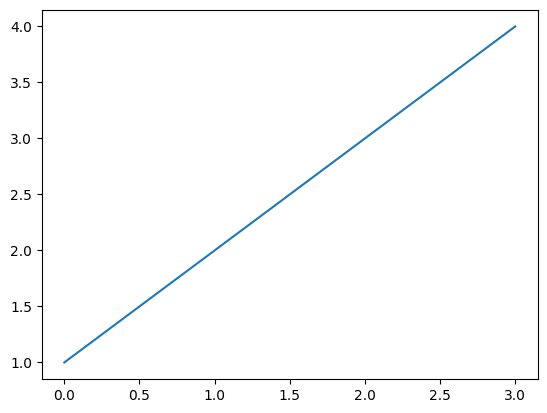

In [2]:
# 라인 그래프
# plt.plot([]) -> 리스트의 값이 하나만 존재하면 y축의 값으로 지정
# plt.plot([],[]) -> 앞의 리스트의 값은 x축, 뒤의 리스트의 값은 y축이 된다.
plt.plot([1,2,3,4])
plt.show()

# subplot()
1. 한 영역에 그래프를 여러개 그려주기 위한 함수
2. subplot(행의 개수, 열의 개수, 위치)

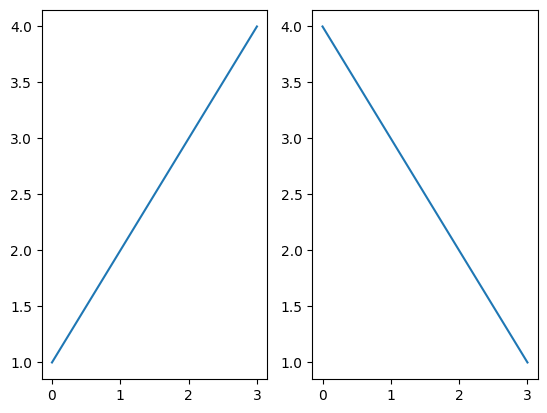

In [3]:
plt.subplot(1,2,1)
plt.plot([1,2,3,4])
plt.subplot(1,2,2)
plt.plot([4,3,2,1])
plt.show()

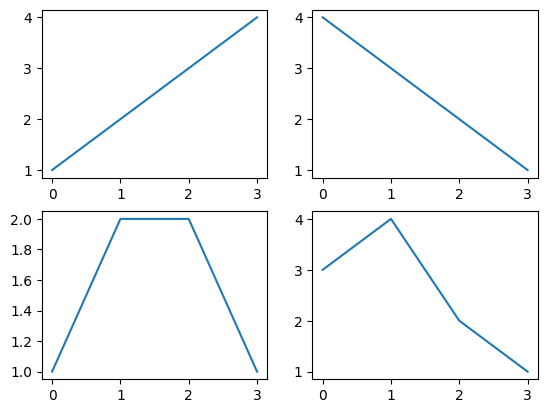

In [6]:
fig, axes = plt.subplots(2,2)
axes[0][0].plot([1,2,3,4])
axes[0][1].plot([4,3,2,1])
axes[1][0].plot([1,2,2,1])
axes[1][1].plot([3,4,2,1])
plt.show()

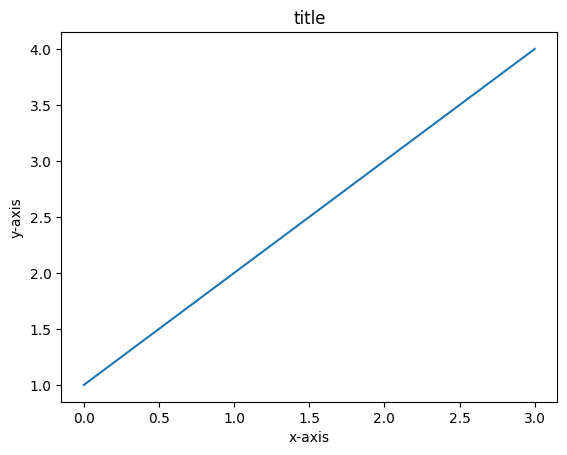

In [7]:
# x축의 이름과 y축의 이름, 그래프의 이름 지정
plt.plot([1,2,3,4])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('title')
plt.show()


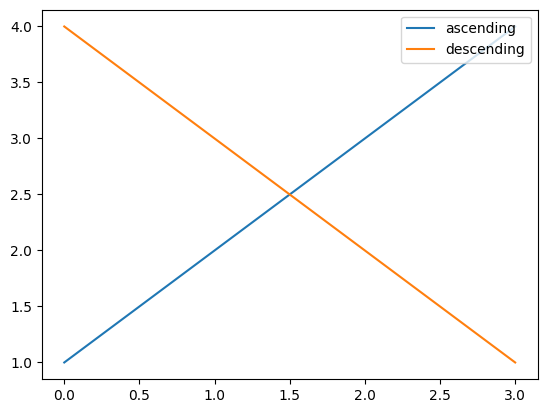

In [8]:
# 범례 추가
plt.plot([1,2,3,4], label ='ascending')
plt.plot([4,3,2,1], label ='descending')
plt.legend(loc ="upper right")
plt.show()

In [ ]:
data = [1,2,2,3,3,3,4,4,4,4]


In [9]:
!pip install finance-datareader

     ---------------------------------------- 77.1/77.1 kB 2.1 MB/s eta 0:00:00


In [10]:
import FinanceDataReader as fdr

In [13]:
kospi = fdr.DataReader('ks11', '2019')

In [15]:
import platform
if platform.system() =="Darwin": # MAC 인 경우
    plt.rc('font, family = AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')


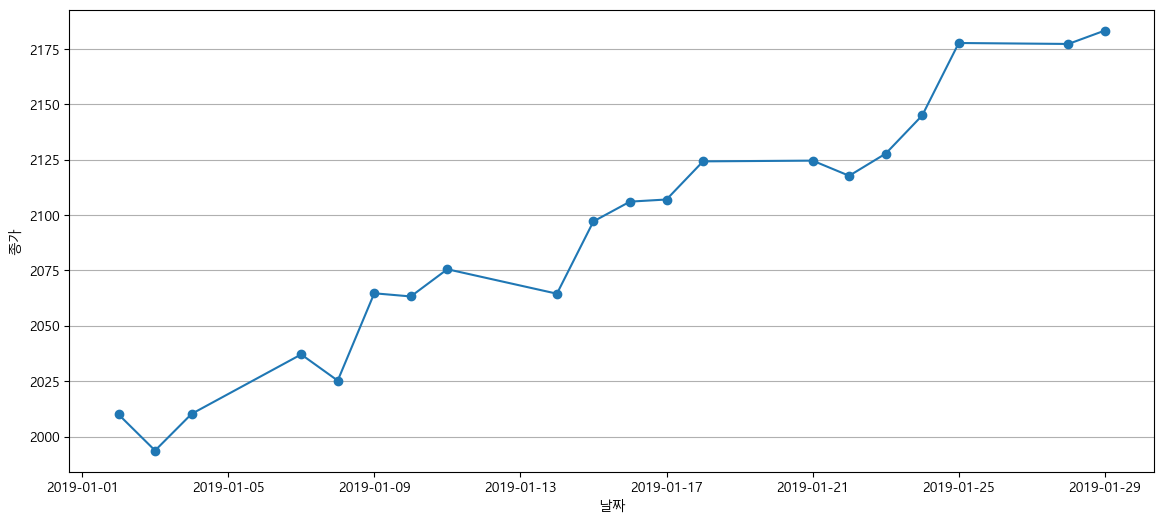

In [16]:
plt.figure(figsize=(14,6))
# grid 추가
plt.grid(True, axis='y')
plt.plot(kospi['Close'].head(20), marker='o')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.show()

In [18]:
mean_kospi_2020 = kospi.loc['2020'].resample('MS').mean()
mean_kospi_2020

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,2207.549011,2218.407983,2192.596985,2203.442480,2203.442480,6.547750e+05
2020-02-01,2166.166009,2183.180481,2150.528473,2167.123486,2167.123486,6.979300e+05
2020-03-01,1794.281372,1824.905923,1751.699097,1786.746360,1786.746360,7.768545e+05
2020-04-01,1844.271509,1864.863995,1825.824017,1849.588989,1849.588989,1.052250e+06
2020-05-01,1963.487883,1975.821578,1949.949990,1965.174214,1965.174214,8.529158e+05
2020-06-01,2134.890436,2154.157715,2112.594993,2134.696827,2134.696827,9.028227e+05
2020-07-01,2197.626518,2209.355692,2184.291759,2195.948677,2195.948677,8.202739e+05
2020-08-01,2354.817493,2370.443506,2330.037500,2349.873010,2349.873010,8.815750e+05
2020-09-01,2375.035714,2385.536691,2355.750942,2371.516171,2371.516171,9.336571e+05


In [29]:
# x축은 'xxxx년xx월' 표시
mean_kospi_2020.index[0].strftime('%Y-%m')

'2020-01'

In [30]:
x = []
for i in mean_kospi_2020.index:
    x.append(i.strftime('%Y-%m'))

x

['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

In [32]:
list(map(lambda x: x.strftime('%Y-%m'), mean_kospi_2020.index))

['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

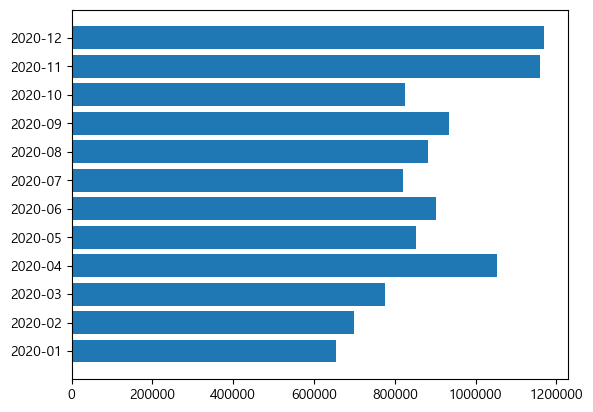

In [35]:
plt.barh(x, mean_kospi_2020['Volume'])
# 지수표현식을 일반 표현식으로 변경
plt.ticklabel_format(axis='x', style = 'plain')
plt.show()

In [36]:
# kospi에서 변동률 파생변수
# 변동률 = (종가 - 시가)/ 시가 * 100
kospi['변동률'] = (kospi['Close'] - kospi['Open'])/ kospi['Open'] * 100
kospi.head()

,Open,High,Low,Close,Adj Close,Volume,변동률
Date,,,,,,,
2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,2010.000000,326400,-1.977521
2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,1993.699951,428000,-0.900190
2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,2010.250000,409000,0.895903
2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,2037.099976,440200,0.140592
2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,2025.270020,397800,-0.657780


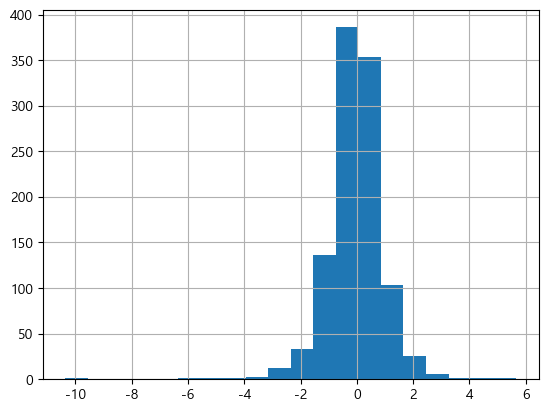

In [38]:
# 음수를 표시
plt.rcParams['axes.unicode_minus'] = False
# plt.rc("axis", unicode_minus=False)

plt.grid()
plt.hist(kospi['변동률'], bins=20)
plt.show()

### candle stick

In [39]:
!pip install mplfinance

     ---------------------------------------- 73.1/73.1 kB 3.9 MB/s eta 0:00:00


In [40]:
import mplfinance as mpf

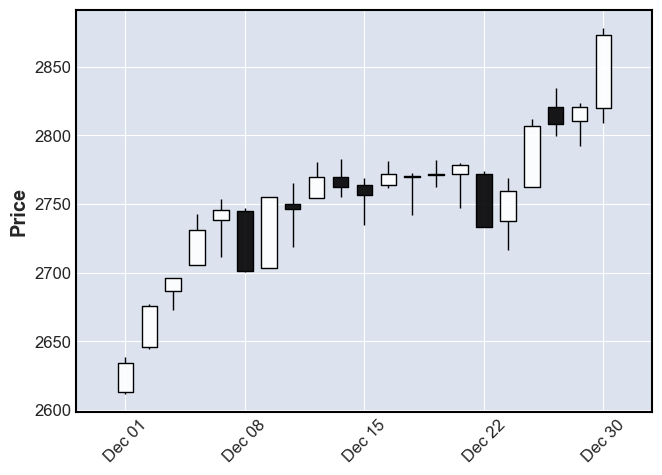

In [41]:
mpf.plot(data=kospi.loc['2020-12'], type='candle')

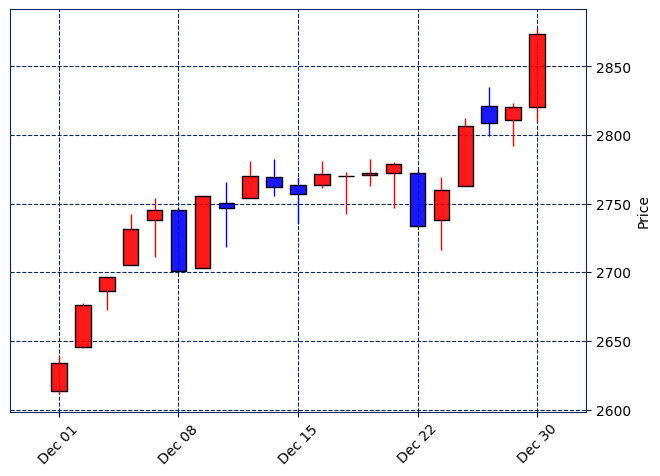

In [46]:
marketcolor = mpf.make_marketcolors(
    up = "r",
    down = 'b',
    edge = 'inherit', #테두리
    wick = 'inherit' #꼬리
)

style = mpf.make_mpf_style(
    base_mpf_style = 'starsandstripes', # 그래프의 기본값. 형태 'binance', 'brasil', 'yahoo' 도 있음
    marketcolors = marketcolor,
    gridaxis = 'both',
    y_on_right = True
)

mpf.plot(data = kospi.loc['2020-12'], type='candle', style = style)

# 문제
1. test_csv 폴더 안에 있는 오프라인.csv을 로드
2. 컬럼의 이름을 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']으로 변경
3. 기준년월을 시계열 데이터로 변경
4. index를 기준년월로 변경
5. 온라인.csv 파일도 위의 작업을 반복한다. 온라인에는 '업종'이 없음
6. 온라인에 업종 컬럼을 추가하여 '온라인'으로 값을 지정
7. 두개의 데이터프레임을 유니언 결합
8. 기준년월, 업종별로 총이용금액의 합계를 라인 그래프로 표시

In [20]:
import pandas as pd
offline = pd.read_csv("../test_csv/오프라인.csv", encoding='cp949')
online = pd.read_csv("../test_csv/온라인.csv", encoding='cp949')

In [21]:
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [22]:
offline

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [23]:
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [24]:
offline.set_index('기준년월', inplace=True)

In [25]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [26]:
online['업종'] ='온라인'

In [27]:
online

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,20,272915,13854081656,온라인
3,201901,1,30,1320227,82946127640,온라인
4,201901,1,40,1372052,95550848337,온라인
...,...,...,...,...,...,...
646,202109,2,50,3237324,181360535814,온라인
647,202109,2,60,1019719,70026626874,온라인
648,202109,2,70,159261,13091029631,온라인
649,202109,2,80,20094,1935122483,온라인


In [28]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format='%Y%m')

In [29]:
online.set_index('기준년월', inplace=True)

In [31]:
df = pd.concat([offline, online])
df

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,백화점,1,10,379,1.945872e+07
2019-01-01,백화점,1,20,45173,4.747711e+09
2019-01-01,백화점,1,30,271858,2.791826e+10
2019-01-01,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...
2021-09-01,온라인,2,50,3237324,1.813605e+11
2021-09-01,온라인,2,60,1019719,7.002663e+10
2021-09-01,온라인,2,70,159261,1.309103e+10


In [73]:
sum_1 = df.groupby([df.index, '업종']).sum()['총이용금액']

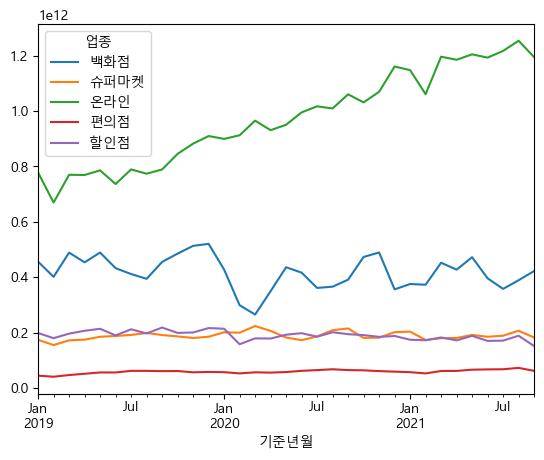

In [74]:
sum_2 = sum_1.unstack().plot()

In [44]:
import matplotlib.pyplot as plt

In [62]:
pivot_data = pd.pivot_table(
    df,
    index = df.index,
    columns = '업종',
    values ='총이용금액',
    aggfunc= 'sum'
)

In [66]:
import platform
import matplotlib.pyplot as plt
if platform.system() =="Darwin": # MAC 인 경우
    plt.rc('font, family = AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')


<AxesSubplot:xlabel='기준년월'>

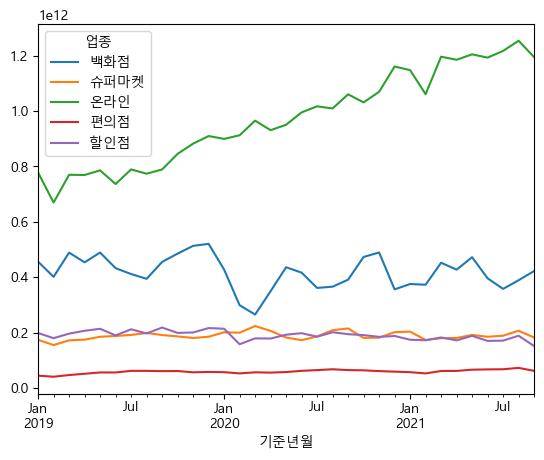

In [67]:
pivot_data.plot()